# TEAM - THE BUG BUSTERS
###### BY NAJEEB SAIYED
###### BY VABHAV KAPIL
najeeb.saiyed.btech2021@sitpune.edu.in

---

Problem Statement:

Automated Medical Forms Extraction for Efficient Healthcare Data Management



---

# Using Gemini Vision Pro





### Importing necessary libraries

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata
from pathlib import Path
from IPython.display import Markdown
from IPython.display import Image

## SET API KEY

In [ ]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## LIST OF MODELS

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [ ]:
# Model Configuration
MODEL_CONFIG = {
  "temperature": 0.2,
  "top_p": 1,
  "top_k": 32,
  "max_output_tokens": 4096,
}


In your MODEL_CONFIG, the parameters are set as follows:


*   temperature: It controls the randomness of the sampling process. A lower temperature leads to more deterministic outputs, while a higher temperature leads to more diverse but possibly less coherent outputs.
*   top_p: This is set to 1, which means that the model will consider all tokens in the vocabulary during sampling.

*   top_k: This is set to 32, which means that at each step of text generation, the model will only consider the top 32 most likely tokens.

In [ ]:
# Future Scope

# ## Safety Settings of Model
# safety_settings = [
#   {
#     "category": "HARM_CATEGORY_HARASSMENT",
#     "threshold": "BLOCK_MEDIUM_AND_ABOVE"
#   },
#   {
#     "category": "HARM_CATEGORY_HATE_SPEECH",
#     "threshold": "BLOCK_MEDIUM_AND_ABOVE"
#   },
#   {
#     "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
#     "threshold": "BLOCK_MEDIUM_AND_ABOVE"
#   },
#   {
#     "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
#     "threshold": "BLOCK_MEDIUM_AND_ABOVE"
#   }
# ]

## LOAD GEMINI MODEL WITH MODEL CONFIGURATIONS

In [ ]:
model = genai.GenerativeModel(model_name = "gemini-pro-vision",
                              generation_config = MODEL_CONFIG)
                              # safety_settings = safety_settings)

## DEFINE IMAGE FORMAT TO INPUT IN GEMINI

In [ ]:
def image_format(image_path):
    img = Path(image_path)

    if not img.exists():
        raise FileNotFoundError(f"Could not find image: {img}")

    image_parts = [
        {
            "mime_type": "image/png", ## Mime type are PNG - image/png. JPEG - image/jpeg. WEBP - image/webp
            "data": img.read_bytes()
        }
    ]
    return image_parts


## GEMINI MODEL OUTPUT

In [ ]:
def gemini_output(image_path, system_prompt, user_prompt):

    image_info = image_format(image_path)
    input_prompt= [system_prompt, image_info[0], user_prompt]
    response = model.generate_content(input_prompt)
    return response.text

## EXTRACTING WHOLE DATA IN JSON FROM INVOICE

In [ ]:
system_prompt = """
               You are a specialist in comprehending medical forms.
               Input images in the form of medical forms will be provided to you,
               and your task is to understand all the text in the image and respond to the question accordingly
               """
#system_prompt = "Convert Invoice data into json format with appropriate json tags as required for the data in image "
user_prompt = "convert medical form data into json format with appropriate json tags as required for the data in image"

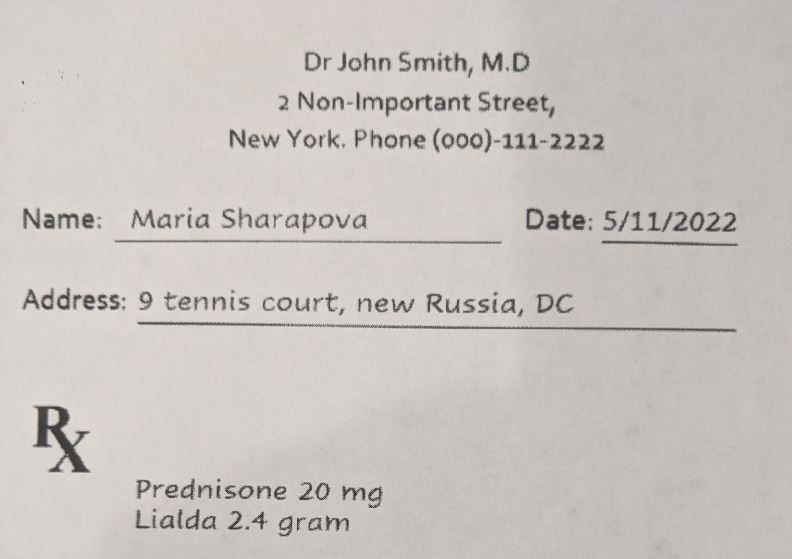

In [ ]:
image_path = "/content/clear_image.jpg"
# Display the image
Image(image_path)

In [ ]:
output = gemini_output(image_path, system_prompt, user_prompt)

In [ ]:
Markdown(output)

 ```json
{
  "doctor": {
    "name": "Dr. John Smith, M.D.",
    "address": "2 Non-Important Street, New York",
    "phone": "(000)-111-2222"
  },
  "patient": {
    "name": "Maria Sharapova",
    "address": "9 Tennis Court, New Russia, DC",
    "date": "5/11/2022"
  },
  "prescription": [
    {
      "name": "Prednisone",
      "dosage": "20 mg"
    },
    {
      "name": "Lialda",
      "dosage": "2.4 gram"
    }
  ]
}
```

## Image 3

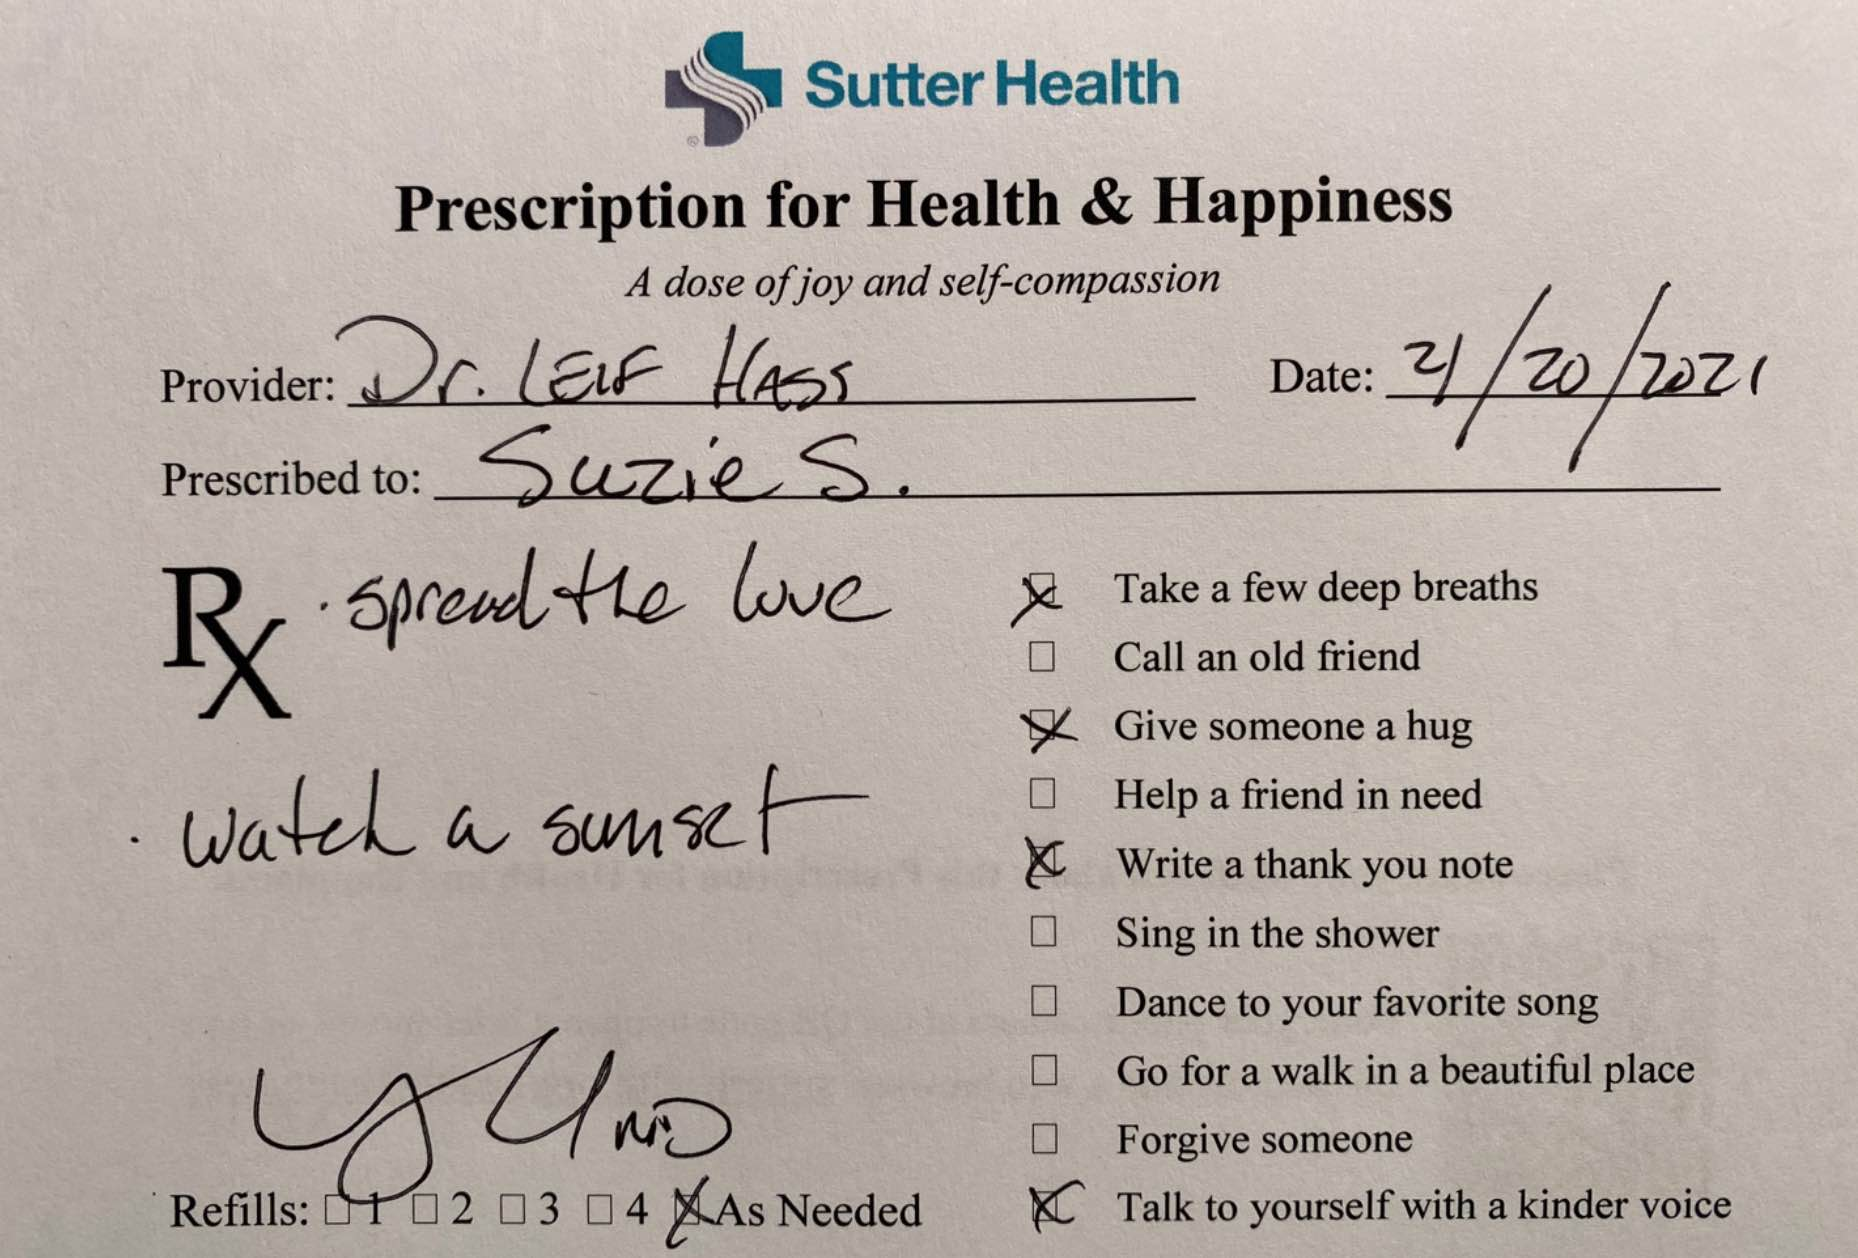

In [ ]:
image_path = "/content/doctor 3.jpg"
# Display the image
Image(image_path)

In [ ]:
output = gemini_output(image_path, system_prompt, user_prompt)
Markdown(output)

 ```json
{
  "prescription": {
    "provider": "Dr.Leif Hass",
    "date": "3/20/2021",
    "prescribed to": "Suzie S.",
    "medication": [
      "spread the love",
      "watch a sunset"
    ],
    "instructions": [
      "Take a few deep breaths",
      "Call an old friend",
      "Give someone a hug",
      "Help a friend in need",
      "Write a thank you note",
      "Sing in the shower",
      "Dance to your favorite song",
      "Go for a walk in a beautiful place",
      "Forgive someone",
      "Talk to yourself with a kinder voice"
    ],
    "refills": "2",
    "prn": "As Needed"
  }
}
```

## Image 4

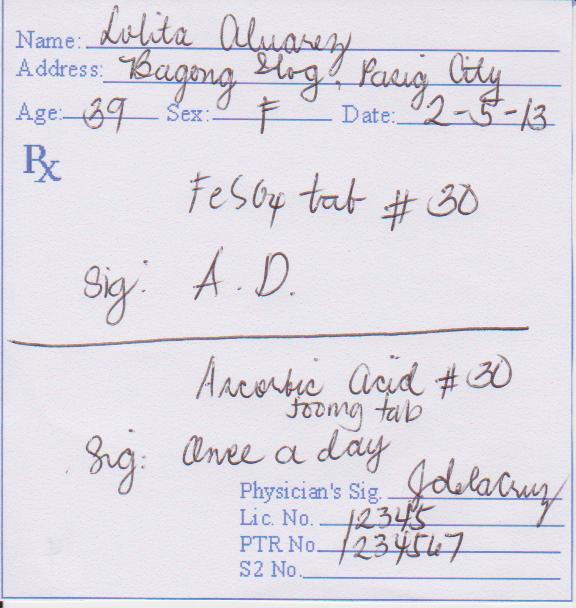

In [ ]:
image_path = "/content/doctor 2.jpg"
# Display the image
Image(image_path)

In [ ]:
output = gemini_output(image_path, system_prompt, user_prompt)
Markdown(output)

 ```json
{
  "patient": {
    "name": "Lolita Alvarez",
    "address": "Bagong Silog, Pasig City",
    "age": 69,
    "sex": "F",
    "date": "2-5-13"
  },
  "prescription": [
    {
      "medication": "FeSO4 tab",
      "quantity": 30,
      "sig": "A.D."
    },
    {
      "medication": "Ascorbic Acid",
      "quantity": 30,
      "dosage": "500mg",
      "sig": "once a day"
    }
  ],
  "physician": {
    "name": "J. Delacruz",
    "license_number": "12345",
    "ptr_number": "1234567",
    "s2_number": "123456"
  }
}
```

## Image 5

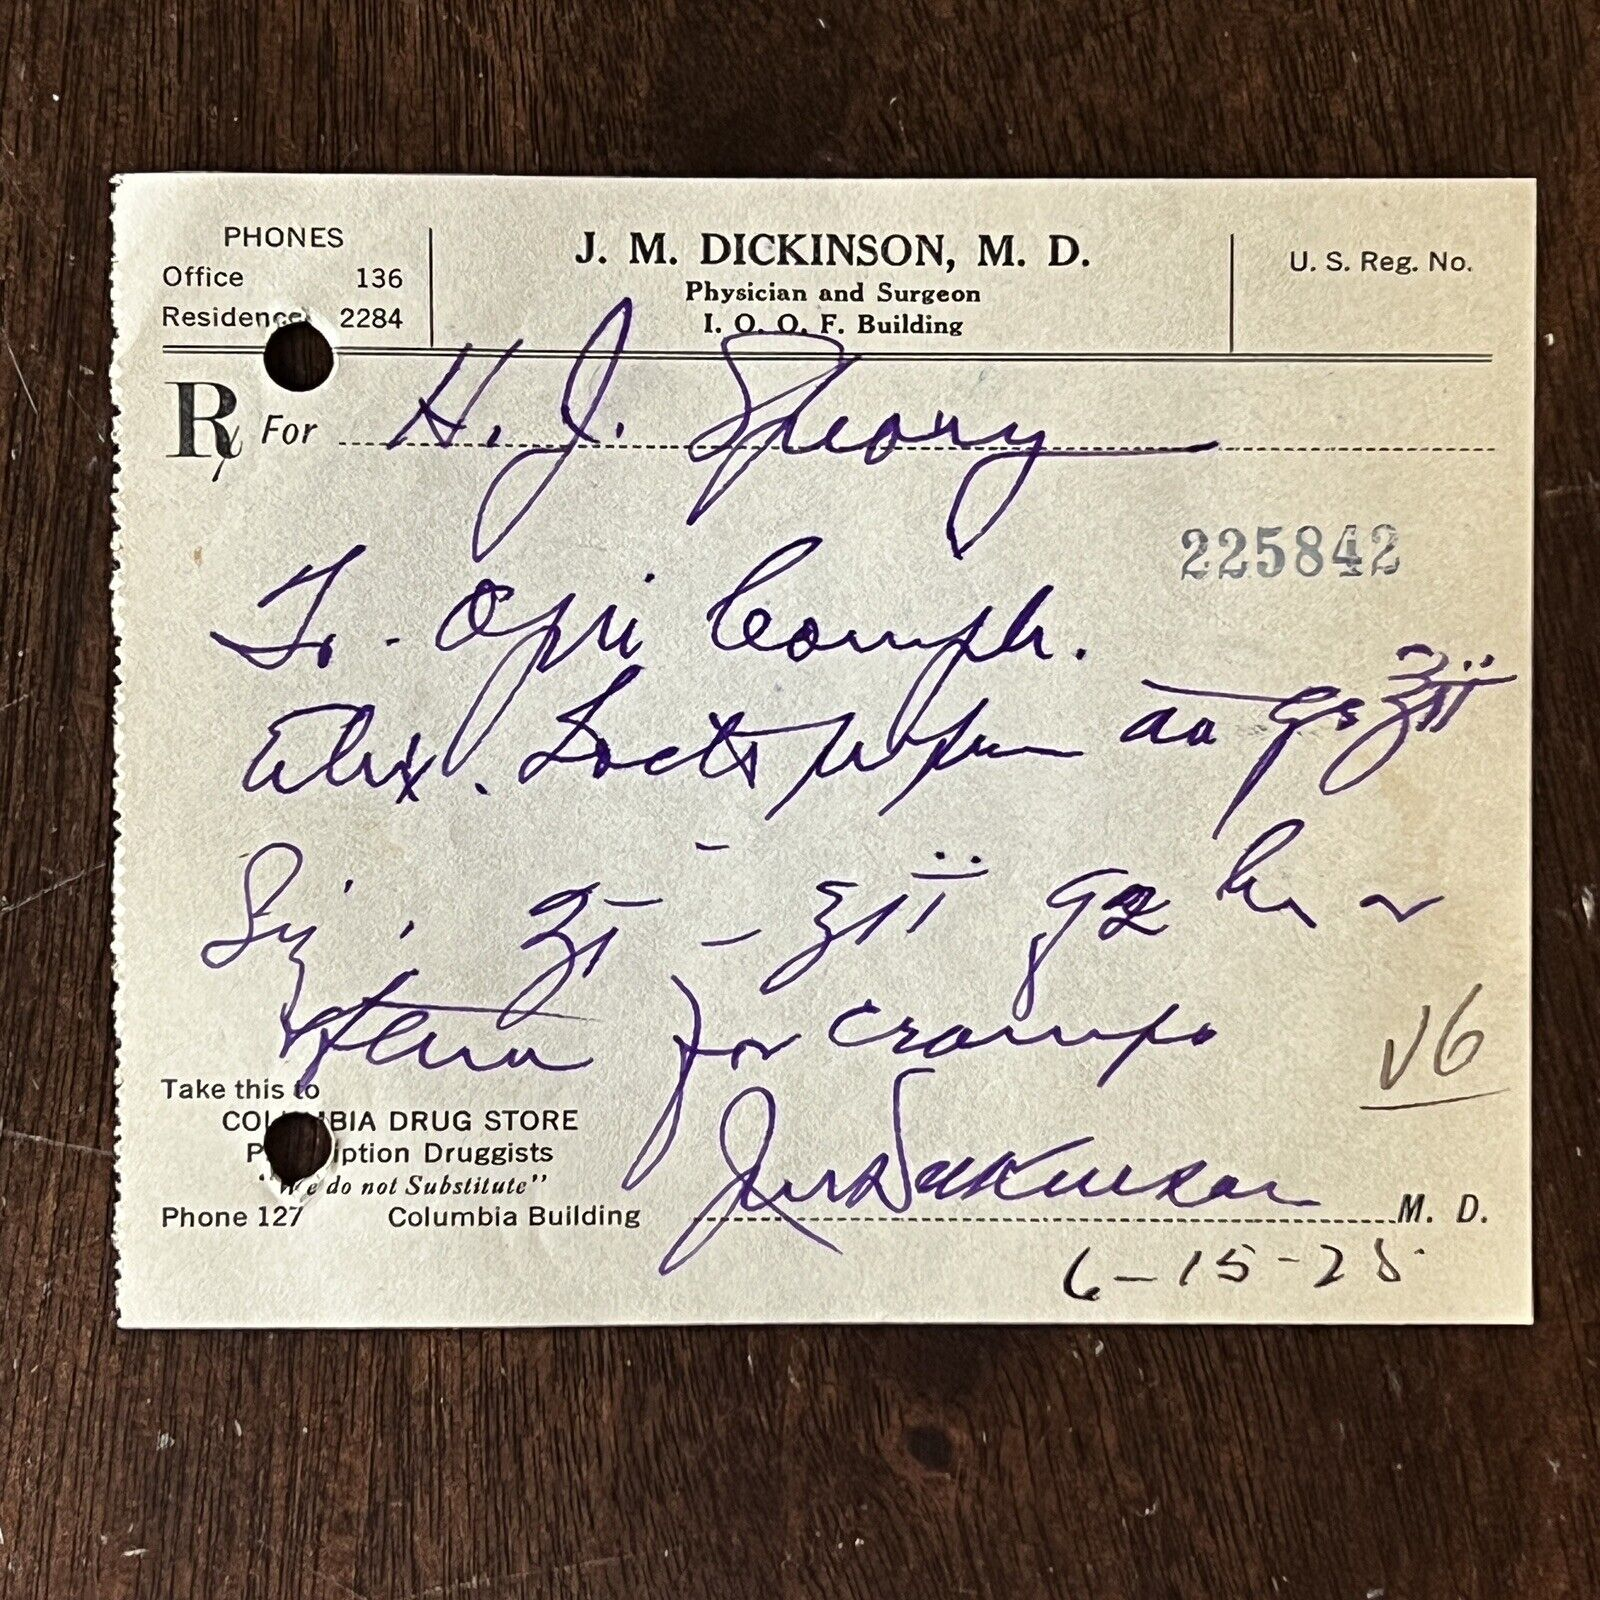

In [ ]:
image_path = "/content/doctor handwriting.jpg"
# Display the image
Image(image_path)

In [ ]:
output = gemini_output(image_path, system_prompt, user_prompt)
Markdown(output)

 ```json
{
  "patient_name": "H. J. Sheary",
  "prescribed_by": "J. M. Dickinson, M.D.",
  "date": "6-15-28",
  "medication": {
    "name": "Cough Syrup",
    "dosage": "1 teaspoonful every 3 hours",
    "quantity": "1 pint"
  },
  "pharmacy": {
    "name": "Columbia Drug Store",
    "address": "127 Columbia Building",
    "phone_number": "127"
  }
}
```